# Hyper-Localized Analysis of Lead Poisoning in New York City

This analysis examines the nuances and the concerning disparities of lead poisoning in New York City's neighborhoods.

### Import libraries

#### Import pandas, seaborn, numpy, and matplotlib.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Import the Data

In [2]:
df_bloodLvls = pd.read_csv("BloodLevels.csv")
df_bloodLvls.describe()

,geo_area_id,borough_id,time_period,Children under 6 years with elevated blood lead levels (BLL) Number BLL >=5 µg/dL,Children under 6 years with elevated blood lead levels (BLL) Number BLL>=10 µg/dL,Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL,Children under 6 years with elevated blood lead levels (BLL) Number Tested,Children under 6 years with elevated blood lead levels (BLL) Number Tested _NOTES,"Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=5 µg/dL per 1,000 tested","Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=10 µg/dL per 1,000 tested","Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=15 µg/dL per 1,000 tested"
count,576.000000,564.000000,576.000000,576.000000,576.000000,576.000000,576.000000,0.0,576.000000,576.000000,576.000000
mean,252.708333,2.851064,2010.500000,1016.967014,99.234375,34.130208,20071.180556,NaN,46.913542,4.418403,1.484549
std,149.094653,1.255531,3.455053,3127.307541,274.841442,93.393634,48789.333503,NaN,38.924295,3.128868,1.072739
min,1.000000,1.000000,2005.000000,5.000000,0.000000,0.000000,800.000000,NaN,3.100000,0.000000,0.000000
25%,106.750000,2.000000,2007.750000,109.500000,12.000000,4.000000,4600.000000,NaN,17.675000,2.300000,0.700000
50%,256.000000,3.000000,2010.500000,267.000000,31.000000,11.000000,7500.000000,NaN,32.450000,3.600000,1.300000
75%,402.250000,4.000000,2013.250000,700.250000,68.000000,23.250000,12200.000000,NaN,65.250000,5.600000,1.900000
max,504.000000,5.000000,2016.000000,37344.000000,3082.000000,1014.000000,342900.000000,NaN,182.800000,19.900000,6.000000


#### Examine the head of the data.

In [3]:
df_bloodLvls.head(13)

,geo_type,geo_area_id,geo_area_name,borough_id,time_period,Children under 6 years with elevated blood lead levels (BLL) Number BLL >=5 µg/dL,Children under 6 years with elevated blood lead levels (BLL) Number BLL >=5 µg/dL _NOTES,Children under 6 years with elevated blood lead levels (BLL) Number BLL>=10 µg/dL,Children under 6 years with elevated blood lead levels (BLL) Number BLL>=10 µg/dL _NOTES,Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL,Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL _NOTES,Children under 6 years with elevated blood lead levels (BLL) Number Tested,Children under 6 years with elevated blood lead levels (BLL) Number Tested _NOTES,"Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=5 µg/dL per 1,000 tested","Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=5 µg/dL per 1,000 tested_NOTES","Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=10 µg/dL per 1,000 tested","Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=10 µg/dL per 1,000 tested_NOTES","Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=15 µg/dL per 1,000 tested","Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=15 µg/dL per 1,000 tested_NOTES"
0,Borough,1,Bronx,1.0,2005,8245,NaN,595,NaN,167,NaN,64500,NaN,127.7,NaN,9.2,NaN,2.6,NaN
1,Borough,1,Bronx,1.0,2006,7272,NaN,474,NaN,144,NaN,67200,NaN,108.2,NaN,7.1,NaN,2.1,NaN
2,Borough,1,Bronx,1.0,2007,6174,NaN,438,NaN,135,NaN,68300,NaN,90.4,NaN,6.4,NaN,2.0,NaN
3,Borough,1,Bronx,1.0,2008,4254,NaN,292,NaN,105,NaN,69800,NaN,60.9,NaN,4.2,NaN,1.5,NaN
4,Borough,1,Bronx,1.0,2009,2742,NaN,278,NaN,103,NaN,70000,NaN,39.2,NaN,4.0,NaN,1.5,NaN
5,Borough,1,Bronx,1.0,2010,2625,NaN,290,NaN,101,NaN,70100,NaN,37.5,NaN,4.1,NaN,1.4,NaN
6,Borough,1,Bronx,1.0,2011,1996,NaN,231,NaN,75,NaN,70100,NaN,28.5,NaN,3.3,NaN,1.1,NaN
7,Borough,1,Bronx,1.0,2012,1396,NaN,184,NaN,81,NaN,66800,NaN,20.9,NaN,2.8,NaN,1.2,NaN
8,Borough,1,Bronx,1.0,2013,1312,NaN,193,NaN,74,NaN,65300,NaN,20.1,NaN,3.0,NaN,1.1,NaN
9,Borough,1,Bronx,1.0,2014,1186,NaN,177,NaN,68,NaN,63400,NaN,18.7,NaN,2.8,NaN,1.1,NaN


In [4]:

unique_cities = list(set(df_bloodLvls["geo_area_name"]))
forbidden_cities = ["Bronx", "Brooklyn", "New York City", "Queens", "Staten Island"]
unique_cities
for j in unique_cities:
    if j in forbidden_cities:
        unique_cities.remove(j)
    else:
        continue
        
averages_List = []
new_avgs = []
def avgs(loc):
    total = 0
    curNum = -1
    countList = []
    for i in df_bloodLvls["geo_area_name"]:
        curNum += 1
        if df_bloodLvls["geo_area_name"][curNum] == loc:
            total += df_bloodLvls["Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL"][curNum]
            countList.append(df_bloodLvls["Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL"][curNum])
        else:
            continue
    averages_List.append(total/12)
    new_avgs.append(total/12)
    return total/12, countList
        
    
for x in unique_cities:
    print(x, avgs(x))
    
for p in new_avgs:
    if p == 546.0833333333334:
        new_avgs.remove(p)
        
list_05 = []
list_06 = []
list_07 = []
list_08 = []
list_09 = []
list_10 = []
list_11 = []
list_12 = []
list_13 = []
list_14 = []
list_15 = []
list_16 = []
def points(column):
    curNum = -1
    for i in df_bloodLvls["time_period"]:
        curNum += 1
        if df_bloodLvls["time_period"][curNum] == 2005 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_05.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2006 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_06.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2007 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_07.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2008 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_08.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2009 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                list_09.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2010 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2011 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_11.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2012 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_12.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2013 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_13.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2014 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_14.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2015 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_15.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2016 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_16.append(df_bloodLvls[column][curNum])

                
list_05_10 = []
list_06_10 = []
list_07_10 = []
list_08_10 = []
list_09_10 = []
list_10_10 = []
list_11_10 = []
list_12_10 = []
list_13_10 = []
list_14_10 = []
list_15_10 = []
list_16_10 = []
def points2(column):
    curNum = -1
    for i in df_bloodLvls["time_period"]:
        curNum += 1
        if df_bloodLvls["time_period"][curNum] == 2005 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_05_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2006 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_06_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2007 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_07_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2008 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_08_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2009 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_09_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2010 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_10_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2011 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_11_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2012 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_12_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2013 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_13_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2014 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_14_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2015 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_15_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2016 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_16_10.append(df_bloodLvls[column][curNum])
                
list_05_100 = []
list_06_100 = []
list_07_100 = []
list_08_100 = []
list_09_100 = []
list_10_100 = []
list_11_100 = []
list_12_100 = []
list_13_100 = []
list_14_100 = []
list_15_100 = []
list_16_100 = []
def points3(column):
    curNum = -1
    for i in df_bloodLvls["time_period"]:
        curNum += 1
        if df_bloodLvls["time_period"][curNum] == 2005 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_05_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2006 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_06_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2007 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_07_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2008 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_08_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2009 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_09_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2010 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_10_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2011 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_11_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2012 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_12_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2013 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_13_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2014 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_14_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2015 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_15_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2016 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_16_100.append(df_bloodLvls[column][curNum])
                
points("Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL")
avg_05 = np.mean(list_05)
avg_06 = np.mean(list_06)
avg_07 = np.mean(list_07)
avg_08 = np.mean(list_08)
avg_09 = np.mean(list_09)
avg_10 = np.mean(list_10)
avg_11 = np.mean(list_11)
avg_12 = np.mean(list_12)
avg_13 = np.mean(list_13)
avg_14 = np.mean(list_14)
avg_15 = np.mean(list_15)
avg_16 = np.mean(list_16)

timeSeries = [avg_05, avg_06, avg_07, avg_08, avg_09, avg_10, avg_11, avg_12, avg_13, avg_14, avg_15, avg_16]
years = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

points2("Children under 6 years with elevated blood lead levels (BLL) Number BLL >=5 µg/dL")
avg_05_10 = np.mean(list_05_10)
avg_06_10 = np.mean(list_06_10)
avg_07_10 = np.mean(list_07_10)
avg_08_10 = np.mean(list_08_10)
avg_09_10 = np.mean(list_09_10)
avg_10_10 = np.mean(list_10_10)
avg_11_10 = np.mean(list_11_10)
avg_12_10 = np.mean(list_12_10)
avg_13_10 = np.mean(list_13_10)
avg_14_10 = np.mean(list_14_10)
avg_15_10 = np.mean(list_15_10)
avg_16_10 = np.mean(list_16_10)

timeSeries_10 = [avg_05_10, avg_06_10, avg_07_10, avg_08_10, avg_09_10, avg_10_10, avg_11_10, avg_12_10, avg_13_10, avg_14_10, avg_15_10, avg_16_10]

points3("Children under 6 years with elevated blood lead levels (BLL) Number BLL>=10 µg/dL")
avg_05_100 = np.mean(list_05_100)
avg_06_100 = np.mean(list_06_100)
avg_07_100 = np.mean(list_07_100)
avg_08_100 = np.mean(list_08_100)
avg_09_100 = np.mean(list_09_100)
avg_10_100 = np.mean(list_10_100)
avg_11_100 = np.mean(list_11_100)
avg_12_100 = np.mean(list_12_100)
avg_13_100 = np.mean(list_13_100)
avg_14_100 = np.mean(list_14_100)
avg_15_100 = np.mean(list_15_100)
avg_16_100 = np.mean(list_16_100)

timeSeries_100 = [avg_05_100, avg_06_100, avg_07_100, avg_08_100, avg_09_100, avg_10_100, avg_11_100, avg_12_100, avg_13_100, avg_14_100, avg_15_100, avg_16_100]










data = {
    
    'BLL>=15':[avg_05, avg_06, avg_07, avg_08, avg_09, avg_10, avg_11, avg_12, avg_13, avg_14, avg_15, avg_16], 
    'BLL>=5':[avg_05_10, avg_06_10, avg_07_10, avg_08_10, avg_09_10, avg_10_10, avg_11_10, avg_12_10, avg_13_10, avg_14_10, avg_15_10, avg_16_10],
    'BLL>=10':[avg_05_100, avg_06_100, avg_07_100, avg_08_100, avg_09_100, avg_10_100, avg_11_100, avg_12_100, avg_13_100, avg_14_100, avg_15_100, avg_16_100],
    'years':[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]



} 

df_timeSeries = pd.DataFrame(data)


Washington Heights (16.25, [14, 17, 15, 9, 6, 13, 23, 6, 16, 31, 9, 36])
Union Square - Lower East Side (4.25, [0, 9, 2, 4, 5, 2, 1, 2, 4, 12, 4, 6])
Williamsburg - Bushwick (28.916666666666668, [12, 27, 41, 17, 70, 30, 21, 15, 32, 47, 15, 20])
Ridgewood - Forest Hills (11.416666666666666, [16, 9, 21, 8, 11, 14, 6, 4, 17, 9, 13, 9])
Greenpoint (15.166666666666666, [11, 10, 23, 19, 8, 19, 21, 22, 8, 12, 25, 4])
Jamaica (26.0, [37, 17, 49, 40, 21, 13, 30, 25, 19, 22, 15, 24])
Upper East Side (2.1666666666666665, [0, 0, 1, 5, 2, 3, 5, 0, 0, 1, 8, 1])
Hunts Point - Mott Haven (9.416666666666666, [9, 4, 11, 16, 4, 9, 5, 15, 15, 10, 12, 3])
Rockaways (6.333333333333333, [3, 6, 8, 6, 5, 1, 3, 2, 12, 16, 7, 7])
Port Richmond (7.25, [4, 5, 2, 17, 11, 2, 4, 11, 6, 12, 11, 2])
Fresh Meadows (3.5833333333333335, [4, 7, 4, 2, 4, 1, 1, 5, 6, 3, 1, 5])
Bedford Stuyvesant - Crown Heights (34.333333333333336, [16, 42, 81, 21, 12, 26, 22, 17, 52, 26, 69, 28])
Southeast Queens (8.333333333333334, [12, 9,

In [5]:
df_timeSeries.head(25)

,BLL>=15,BLL>=5,BLL>=10,years
0,25.558140,974.255814,79.162791,2005
1,23.720930,903.674419,70.465116,2006
2,18.534884,793.325581,57.697674,2007
3,15.511628,527.813953,46.325581,2008
4,14.046512,389.069767,39.395349,2009
5,14.209302,351.627907,39.697674,2010
6,11.511628,288.023256,33.534884,2011
7,9.860465,204.837209,26.325581,2012
8,8.186047,181.558140,22.744186,2013
9,8.395349,164.372093,23.883721,2014


<AxesSubplot:xlabel='years', ylabel='BLL>=5'>

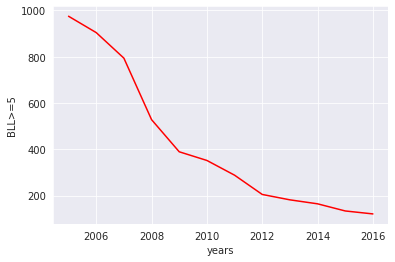

In [6]:
sns.set_style("darkgrid")
sns.lineplot(x="years", y="BLL>=5", color="red", data=df_timeSeries)

### Applying an Exponential Regression

The data follows an exponential curve, indicating the the curve of people with BLL>=5 is flattening, not dying.

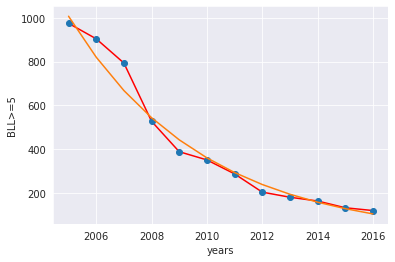

In [7]:
x_data = np.array(df_timeSeries['years'])

y = np.array(df_timeSeries["BLL>=5"])


log_x_data = np.log(x_data)
log_y_data = np.log(y)
curve_fit = np.polyfit(x_data, log_y_data, 1)

c = np.array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

y2 = np.exp(418.078525) * np.exp(-0.205069439*x_data)
sns.lineplot(x="years", y="BLL>=5", color="red", data=df_timeSeries)
plt.plot(x_data, y, "o")
plt.plot(x_data, y2)


In [8]:
# Normalizing Distribution
# pre_avgs = []
# def normalize(loc):
#     total = 0
#     curNum = -1
#     countList = []
#     for i in df_bloodLvls["geo_area_name"]:
#         curNum += 1
#         if df_bloodLvls["geo_area_name"][curNum] == loc:
#             total += df_bloodLvls["Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL"][curNum]
#             countList.append(df_bloodLvls["Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL"][curNum])
#         else:
#             continue
#     averages_List.append(total/12)
#     return total, countList

pre_avgs = []
def normalize(location, column):
    curNum = -1
    countList = []
    total = 0
    for city in df_bloodLvls["geo_area_name"]:
        curNum += 1
        if location == city:
            num = df_bloodLvls[column][curNum]/df_bloodLvls["Children under 6 years with elevated blood lead levels (BLL) Number Tested"][curNum]
            total += num
            countList.append(str(num) + " " + str(df_bloodLvls["time_period"][curNum]))
        else:
            continue
    pre_avgs.append(total/12)
    return total/12, countList
    
for x in unique_cities:
    print(x, normalize(x, "Children under 6 years with elevated blood lead levels (BLL) Number BLL >=5 µg/dL"))
    

Washington Heights (0.04115177487791311, ['0.027 2010', '0.08540540540540541 2007', '0.031376146788990825 2009', '0.016464646464646463 2013', '0.015157894736842105 2014', '0.016886792452830188 2012', '0.05580357142857143 2008', '0.008902439024390243 2016', '0.024017857142857143 2011', '0.10177570093457944 2005', '0.011477272727272727 2015', '0.09955357142857142 2006'])
Union Square - Lower East Side (0.04854544053143173, ['0.026326530612244898 2011', '0.11 2006', '0.008571428571428572 2016', '0.03510204081632653 2010', '0.017826086956521738 2012', '0.015128205128205128 2014', '0.010789473684210526 2015', '0.014047619047619048 2013', '0.0446 2009', '0.13122448979591836 2005', '0.06352941176470588 2008', '0.1054 2007'])
Williamsburg - Bushwick (0.07039073628676763, ['0.021058823529411765 2016', '0.05745901639344262 2010', '0.1256140350877193 2007', '0.03723214285714286 2012', '0.17862068965517242 2005', '0.07905982905982906 2008', '0.04416666666666667 2011', '0.021739130434782608 2015', 

In [9]:
post_avgs = [num*100 for num in pre_avgs]
pre_avgs

data_perc = {'percentage':[0.04281228405989632,
 0.04940533210902779,
 0.04627197047432429,
 0.03056250322882549,
 0.0411019923647798,
 0.01576363391479021,
 0.04620347707715849,
 0.04234444855628685,
 0.029892926263853356,
 0.033445533024480396,
 0.07039073628676763,
 0.04638345634548972,
 0.04923491723974644,
 0.054181035266727205,
 0.047569084409144896,
 0.03300647999212133,
 0.05507983887378625,
 0.04058442861461437,
 0.039942472508327,
 0.04545726297128822,
 0.04303576981006101,
 0.06186094502207349,
 0.04854544053143173,
 0.04854298336130061,
 0.052680896880556355,
 0.05437447315931693,
 0.06756752457933472,
 0.06730336570252518,
 0.0195704988851728,
 0.04210489181076113,
 0.04205963624046144,
 0.05845717068878834,
 0.03524815115440116,
 0.022583257107534224,
 0.0512582517681402,
 0.04115177487791311,
 0.021647527910685808,
 0.05254493817355322,
 0.05227048809857823,
 0.030392793931916757,
 0.10856332753520498,
 0.05325962943357401,
 0.07705142348711261]}
df_perc = pd.DataFrame(data)

# Factor #1: Lead-Wealth Correlations

Load dataset containing income data, % lead risk, and respective neighborhoods.

The dataset containts income factors: Median Income, Average Income, and Poverty Rate.

In [10]:
df_povertyRate = pd.read_csv("daby2.csv")
df_povertyRate.head(40)

,Neighborhood,% With Lead Risk,Poverty Rate,Median Income,Average Income,Borough,Unnamed: 6,Unnamed: 7
0,Bensonhurst - Bay Ridge,0.017237,20,"55,360",74157,Brooklyn,NaN,NaN
1,Crotona -Tremont,0.013301,37.7,"26,910",NaN,Bronx,NaN,NaN
2,Long Island City - Astoria,0.014000,17,"65,392.00","97,379",Queens,NaN,NaN
3,Kingsbridge - Riverdale,0.009200,27.80%,"58,551",83674,Bronx,NaN,NaN
4,Canarsie - Flatlands,0.012754,9.60%,"67,669.00","83,059",Brooklyn,NaN,NaN
5,South Beach - Tottenville,0.007568,9.3,"80,361",90629.89,Staten Island,NaN,reason for outier is significant water quality...
6,Jamaica,0.017023,13.1,"48,559",76362,Queens,NaN,NaN
7,Southeast Queens,0.013103,13,"72,290",67190,Queens,NaN,NaN
8,Fresh Meadows,0.007632,13,"66,483",80815,Queens,NaN,NaN
9,Gramercy Park - Murray Hill,0.003333,11,"115,027","189,311.94",Manhattan,NaN,NaN


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


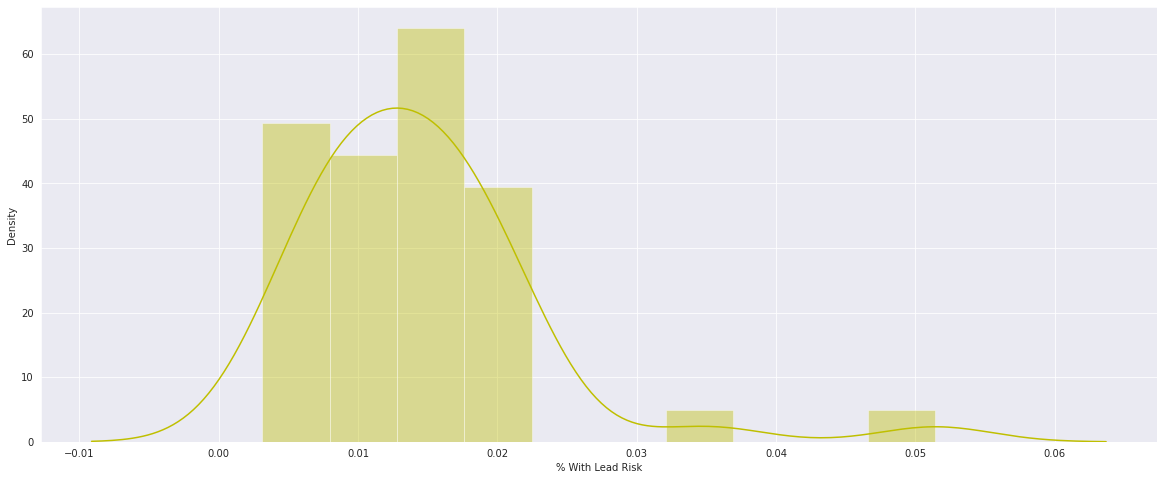

In [11]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.distplot(df_povertyRate["% With Lead Risk"], color="y")

### The neighborhoods that have the highest lead poisoning rates: 

7 are from Brooklyn, 2 from Northern Staten Island, and 1 from Queens

**placeholder**

In [12]:
cur = -1
for l in df_povertyRate["Average Income"]:
    cur += 1
    if isinstance(l, str) == True:
        if "," in l:
            df_povertyRate["Average Income"][cur] = df_povertyRate["Average Income"][cur].replace(',', '')

cur = -1
for l in df_povertyRate["Poverty Rate"]:
    cur += 1
    if isinstance(l, str) == True:
        if "," in l:
            df_povertyRate["Poverty Rate"][cur] = df_povertyRate["Poverty Rate"][cur].replace(',', '')
        if "%" in l:
            df_povertyRate["Poverty Rate"][cur] = df_povertyRate["Poverty Rate"][cur].replace('%', '')

cur = -1
for l in df_povertyRate["Median Income"]:
    cur += 1
    if isinstance(l, str) == True:
        if "," in l:
            df_povertyRate["Median Income"][cur] = df_povertyRate["Median Income"][cur].replace(',', '')

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [13]:
df_povertyRate['Average Income'] = df_povertyRate['Average Income'].astype(float)
df_povertyRate['Poverty Rate'] = df_povertyRate['Poverty Rate'].astype(float)
df_povertyRate['Median Income'] = df_povertyRate['Median Income'].astype(float)

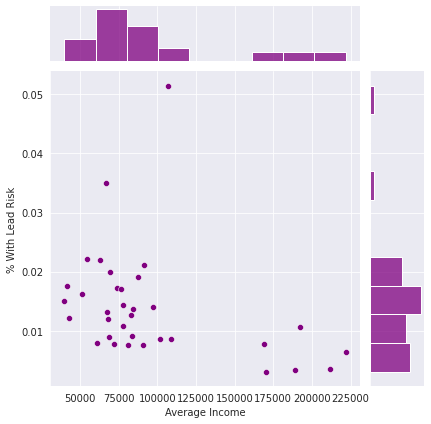

In [14]:
sns.jointplot(x='Average Income',y='% With Lead Risk',data=df_povertyRate,color='purple')

<AxesSubplot:xlabel='Median Income', ylabel='% With Lead Risk'>

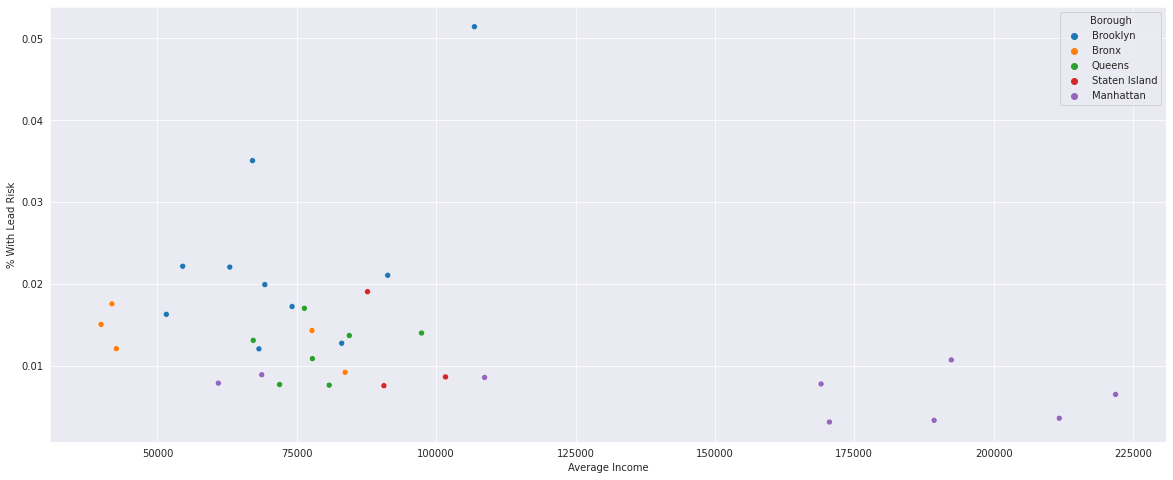

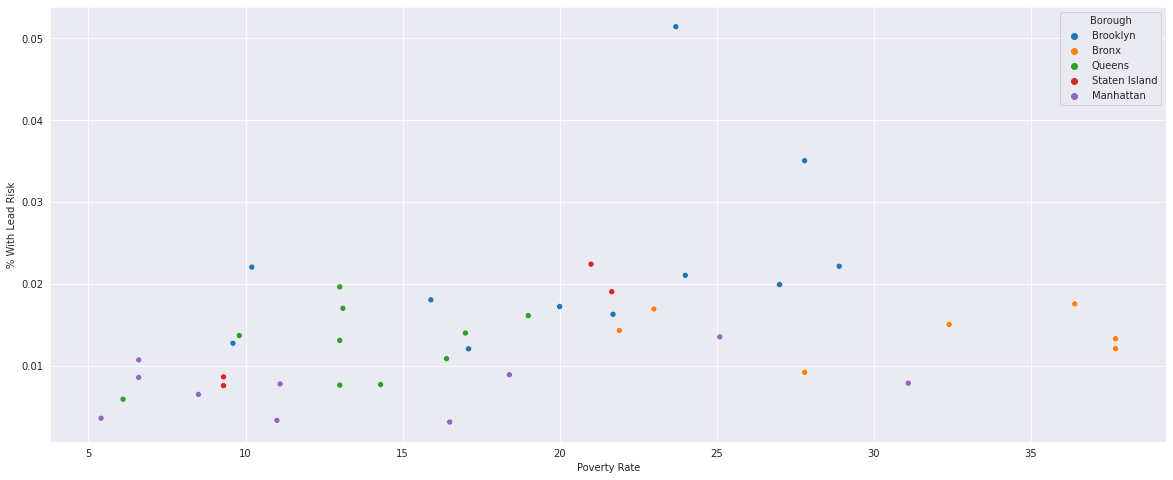

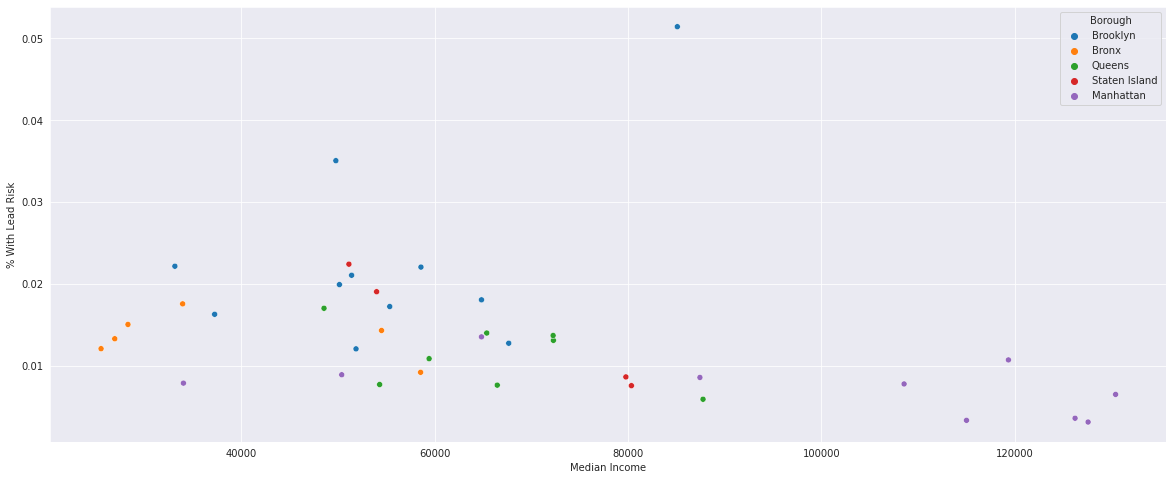

In [15]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=df_povertyRate, x="Average Income", y="% With Lead Risk", hue="Borough")

fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=df_povertyRate, x="Poverty Rate", y="% With Lead Risk", hue="Borough")

fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=df_povertyRate, x="Median Income", y="% With Lead Risk", hue="Borough")

## Visualizing Lead Poisoning Densities Geographically

In [16]:
df_pov = df_povertyRate

ModuleNotFoundError: No module named 'openpyxl'

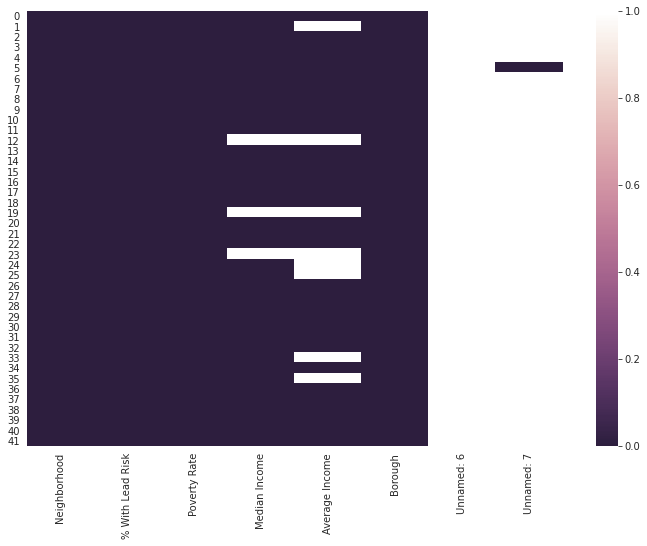

In [17]:
plt.figure(figsize=(12,8))
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(df_pov.isnull(), cmap=cmap)
import openpyxl

In [ ]:
df_pov.to_excel("missingVals.xlsx")

In [ ]:
df_pov_u = pd.read_excel("updated_vals.xlsx")

<AxesSubplot:>

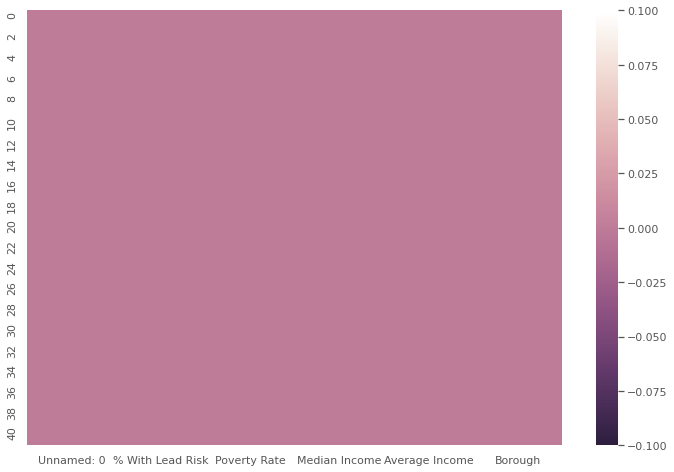

In [ ]:
plt.figure(figsize=(12,8))
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(df_pov_u.isnull(), cmap=cmap)

In [ ]:
import geopandas as gpd
sns.set(style="darkgrid")

In [ ]:
nb = 'geo_export_7e724bd2-6b59-45bb-a9ce-4ccfcba60fb3.shp'
regions = gpd.read_file(nb)

In [ ]:
regions.sample(100)

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry
57,1.0,Manhattan,061,MN25,Battery Park City-Lower Manhattan,1.901430e+07,43738.496041,"MULTIPOLYGON (((-74.00078 40.69429, -74.00096 ..."
162,3.0,Brooklyn,047,BK99,park-cemetery-etc-Brooklyn,2.253394e+08,385534.318657,"MULTIPOLYGON (((-73.91513 40.58627, -73.91510 ..."
73,5.0,Staten Island,085,SI11,Charleston-Richmond Valley-Tottenville,1.456746e+08,84848.455122,"POLYGON ((-74.20700 40.55757, -74.20880 40.557..."
183,4.0,Queens,081,QN99,park-cemetery-etc-Queens,3.090638e+08,487058.987237,"MULTIPOLYGON (((-73.86523 40.57046, -73.86454 ..."
95,5.0,Staten Island,085,SI45,New Dorp-Midland Beach,5.542945e+07,34336.520638,"POLYGON ((-74.08469 40.57148, -74.08595 40.570..."
...,...,...,...,...,...,...,...,...
152,2.0,Bronx,005,BX06,Belmont,1.355942e+07,17117.284009,"POLYGON ((-73.88309 40.86660, -73.88298 40.866..."
148,3.0,Brooklyn,047,BK30,Dyker Heights,2.991874e+07,30729.721847,"POLYGON ((-74.00702 40.63211, -74.00634 40.631..."
192,5.0,Staten Island,085,SI24,Todt Hill-Emerson Hill-Heartland Village-Light...,1.848789e+08,75943.556340,"POLYGON ((-74.09777 40.61062, -74.09730 40.610..."
38,4.0,Queens,081,QN38,Pomonok-Flushing Heights-Hillcrest,3.883596e+07,30731.592023,"POLYGON ((-73.79640 40.73828, -73.79639 40.738..."


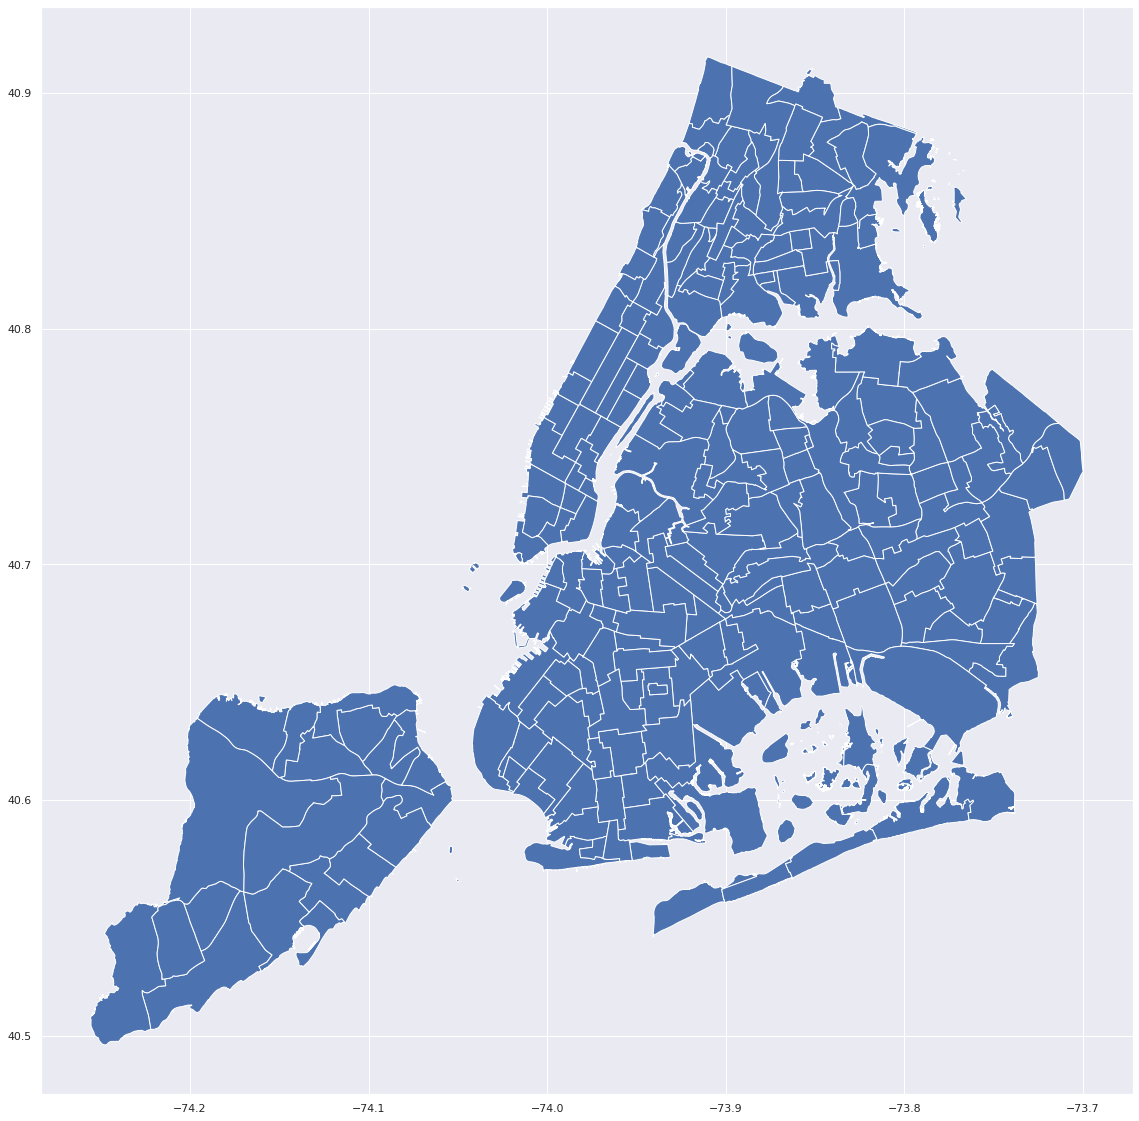

In [ ]:
regions.plot(figsize=(40,20))
plt.show()

In [ ]:
dab = pd.read_csv("data.csv")

In [ ]:
dab.head(40)

,ntaname,Unnamed: 1
0,Borough Park,0.035061
1,Murray Hill,0.007708
2,East Elmhurst,NaN
3,Erasmus,NaN
4,Hollis,NaN
5,Homecrest,NaN
6,Fresh Meadows-Utopia,0.007632
7,Longwood,NaN
8,Midwood,NaN
9,St. Albans,0.013103


In [ ]:
merged = regions.set_index('ntaname').join(dab.set_index('ntaname'))
merged = merged.reset_index()
merged[['ntaname', 'shape_area', 'shape_leng', 'geometry', 'Unnamed: 1']].sample(5)

,ntaname,shape_area,shape_leng,geometry,Unnamed: 1
42,Woodlawn-Wakefield,3.973879e+07,38694.040705,"POLYGON ((-73.83738 40.89392, -73.83646 40.891...",NaN
135,Forest Hills,5.782765e+07,36171.472649,"POLYGON ((-73.83103 40.71434, -73.83115 40.714...",0.013696
183,park-cemetery-etc-Queens,3.090638e+08,487058.987237,"MULTIPOLYGON (((-73.86523 40.57046, -73.86454 ...",NaN
176,Hunters Point-Sunnyside-West Maspeth,1.024216e+08,74592.173365,"POLYGON ((-73.92563 40.75214, -73.92442 40.752...",NaN
1,Murray Hill,5.248828e+07,33266.904872,"POLYGON ((-73.80379 40.77561, -73.80099 40.775...",0.007708


In [ ]:
merged['Unnamed: 1'] = merged['Unnamed: 1'].fillna(0)

<AxesSubplot:title={'center':'Heat Map of Lead Poisoning, New York City'}>

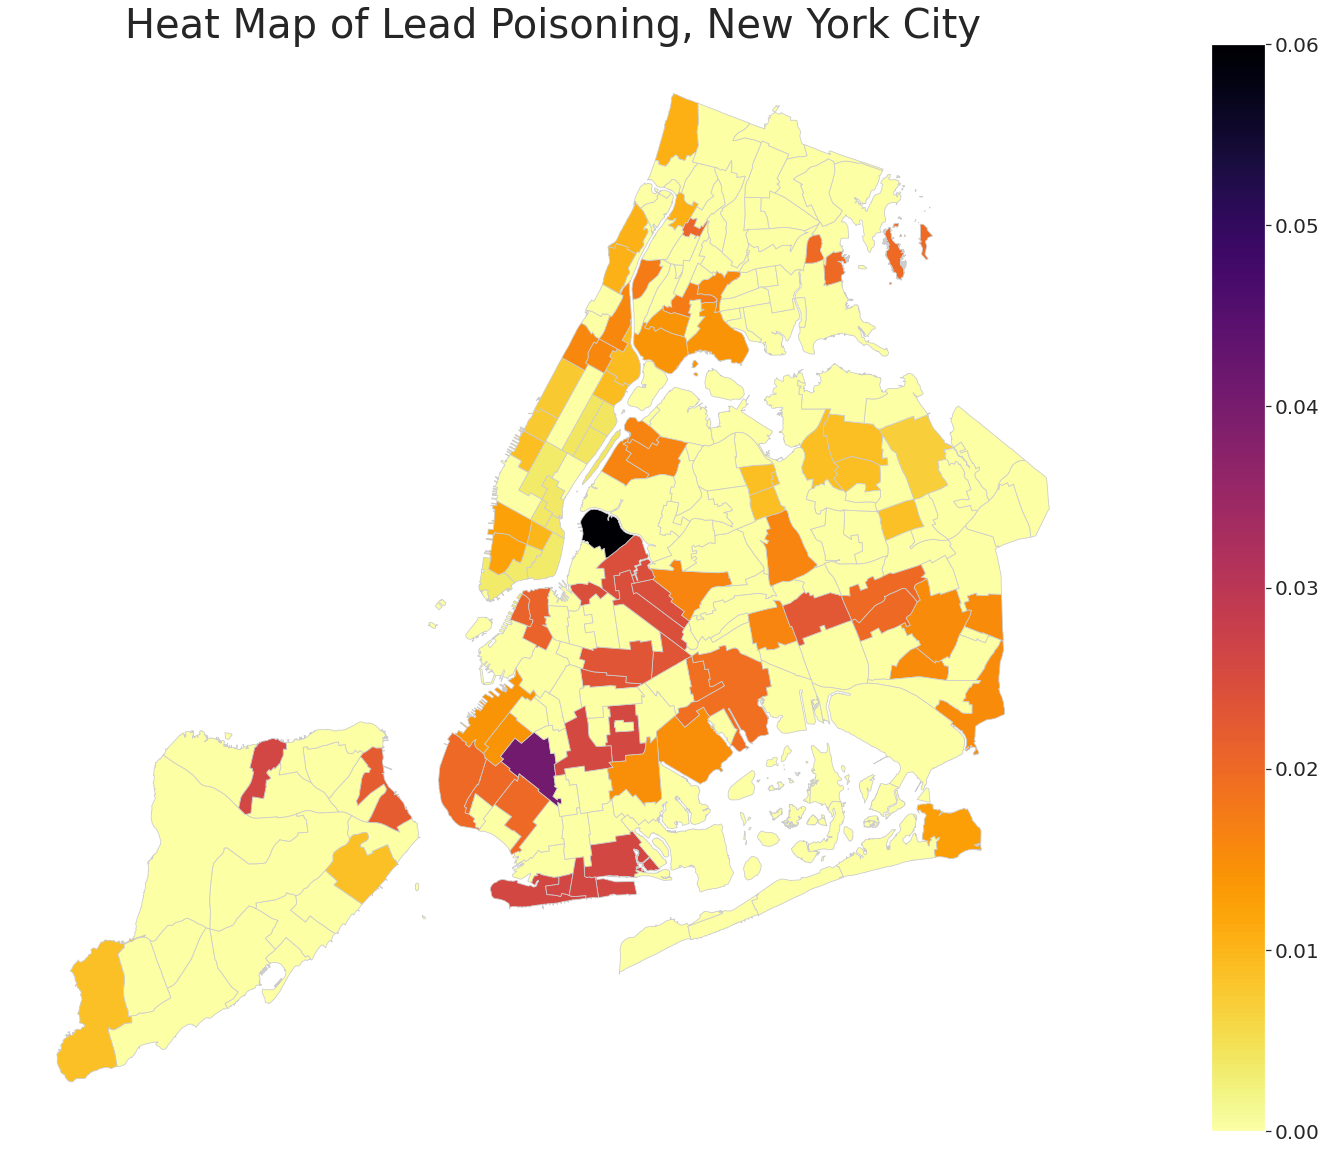

In [ ]:
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of Lead Poisoning, New York City', fontdict={'fontsize': '40', 'fontweight' : '3'})

color = 'inferno_r'
vmin, vmax = 0, 0.06
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

merged.plot('Unnamed: 1', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))

In [ ]:
import numpy as np
import pandas as pd 
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
import time
import datetime
from datetime import datetime, date,timedelta
from scipy import integrate, optimize
from scipy.integrate import odeint
import warnings
warnings.filterwarnings('ignore')

import os

# plotly library
import plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.figure_factory as ff

#matplot lib
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import ticker


import mpld3
mpld3.enable_notebook()
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
matplotlib.style.use('ggplot')
import lmfit
from lmfit.lineshapes import gaussian, lorentzian

In [ ]:
# Top 10 countries with Highest Number of Death Rates


fig = px.bar(df_povertyRate.sort_values('% With Lead Risk',ascending=False)[:10][::-1],x='% With Lead Risk',y='Neighborhood',title='Top 10 Countries with highest number of Death Cases',text='Borough',height=900, orientation='h')

#image_bytes = fig.to_image(format='png', , width=1200, height=700, scale=1) # you can use other formats as well (like 'svg','jpeg','pdf')
#img_bytes = fig.to_image(format="png")
#instead of using fig.show()
##from IPython.display import Image
#Image(img_bytes)
#fig.show()
plotly.offline.iplot(fig)

## Factor #1: Income Dispairities

<AxesSubplot:xlabel='Median Income', ylabel='% With Lead Risk'>

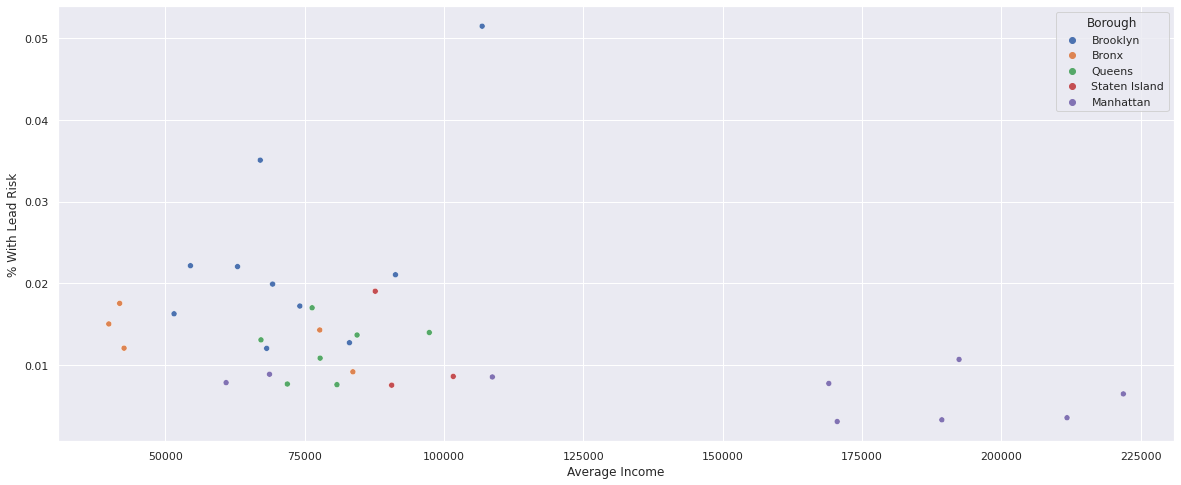

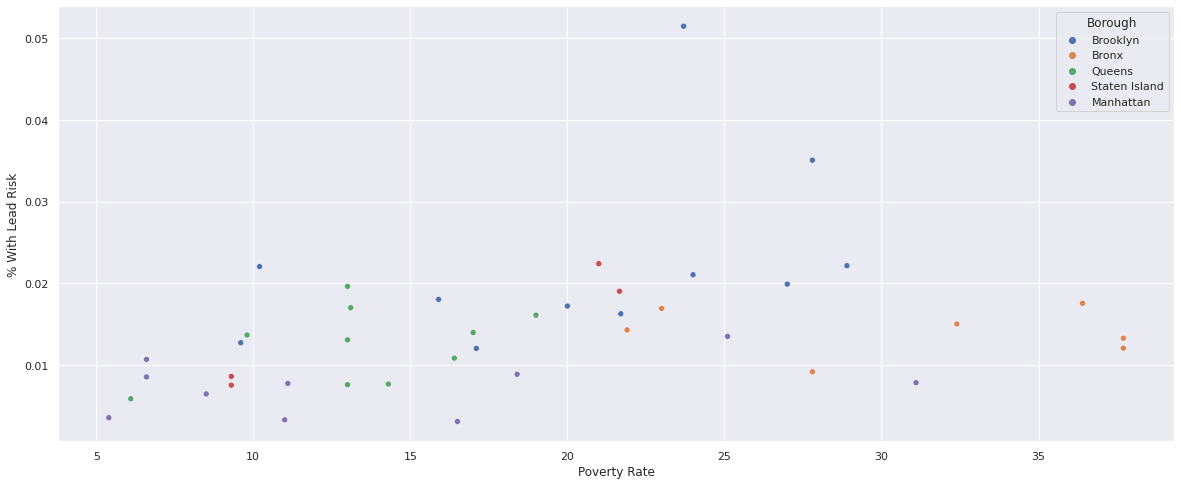

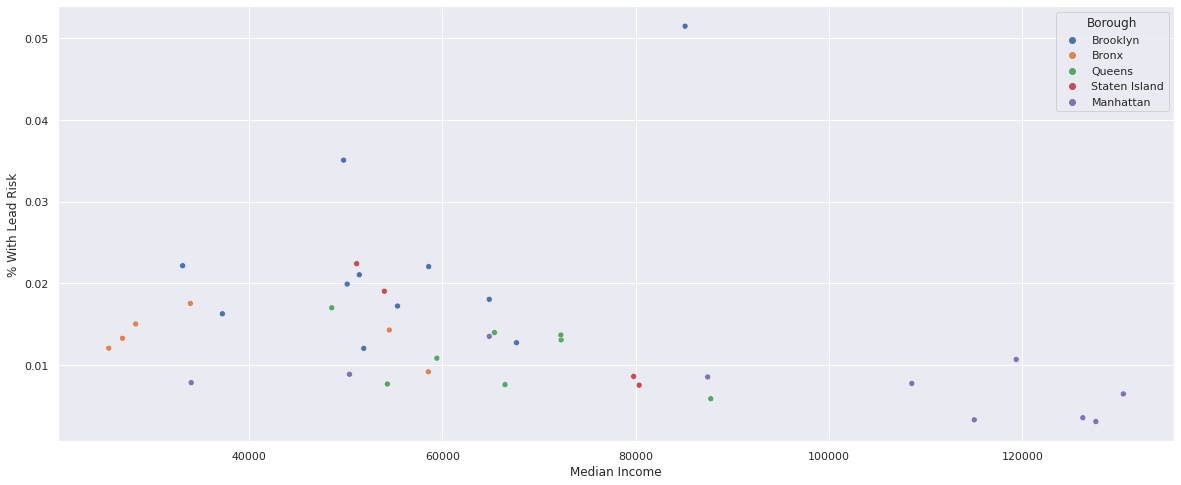

In [ ]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=df_povertyRate, x="Average Income", y="% With Lead Risk", hue="Borough")

fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=df_povertyRate, x="Poverty Rate", y="% With Lead Risk", hue="Borough")

fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=df_povertyRate, x="Median Income", y="% With Lead Risk", hue="Borough")

# Definitive Disparities 

In [38]:
df_pov_u = pd.read_excel("updated_vals.xlsx")
def converter(cluster):
    if cluster == "Brooklyn":
        return 1
    if cluster == "Manhattan":
        return 2
    if cluster == "Staten Island":
        return 3
    if cluster == "Bronx":
        return 4
    if cluster == "Queens":
        return 5

In [39]:
df_pov["Cluster"] = df_pov["Borough"].apply(converter)

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
df_pov_u["Cluster"] = df_pov_u["Borough"].apply(converter)

In [42]:
scaler = StandardScaler()
df_pov_u.drop("Borough", axis=1, inplace=True)
scaler.fit(df_pov_u)

StandardScaler()

In [43]:
scaled_data = scaler.transform(df_pov_u)


In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [45]:
pca.fit(scaled_data)

PCA(n_components=2)

In [46]:
x_pca = pca.transform(scaled_data)

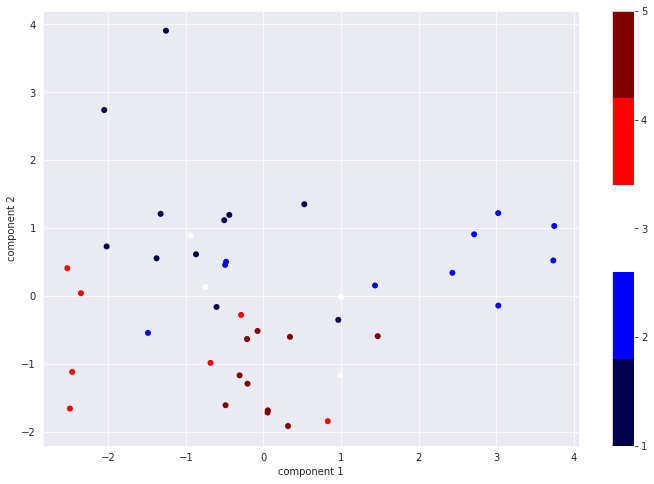

In [48]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(x_pca[:, 0], x_pca[:, 1],
            c=df_pov_u["Cluster"], lw=0.1, edgecolor='none', alpha=1,
            cmap=plt.cm.get_cmap('seismic', 5))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(ticks=[1,2,3,4,5])
plt.clim(1, 5)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6762a019-b4a3-4774-b79c-148850e2281e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>